## Market Basket Analysis

A data mining technique used typically by retailers to increase sales by understanding customer purchasing patterns. 
- Looks at purchase history to reveal products that are likely to be purchased together

    - Do people buy crackers more often when they buy cheese wiz?   

- Apriori algorithm creates association rules which are all the possible combinations of items that were purchased
    - It encodes transactions into boolean checklists of products to find all the distinct relationships as association rules
    
    - **Association Rules**:
        - "If then" relationship
            - If a basket contains crackers then it also contains cheeze wiz
            - If {coffee} then {creamer and sugar}
            - If {peanut butter and jelly} then {bread}
        - The first part is the antecedent, the second part is called the consequent
    - This often creates millions, billions, or trillions of possible combinations, so the results need to be pruned to find the useful rules
    
    <img src="AssociationRules.png" width="500"/>
    
- We apply market basket pruning to the output of the apriori algorithm to get the most meaningful association rules

    - **Pruning Process**: Meaningful associations are pruned using metrics like support, confidence, and lift
        - **Support**: Measures the frequency of occurrence of an itemset in the transactions
        - **Confidence**: Measures the likelihood that item B (consequent) is purchased when item A (antecedent) is purchased
        - **Lift**: Measures the strength of the association between two itemsets
            - Used to determine if the association between A and B is significant beyond what would be expected by chance


- **Assumptions**: 
    - Joint occurrences of products meaning that purchasing one product will lead to the purchase of another
    - Items bought together are meaningful combinations

## Problem Statement

- **Research Question**: Can we use market basket analysis to understand the relationships between items purchased by our customers? 

- Using the answer, the business can then decide how they may be able to:
    - Create bundle pricing strategies to increase the probability of sales
    - Create targeted marketing campaigns and promotions based on item associations
    - Improve inventory counts

## Expected Outcome

- The expected outcome of this analysis is to end up with the best and most succinct association rules that define actionable relationships between the products being sold. There should be less than 30 rules and the top 3 should be clear.  The hope is that business will use this knowledge to sell interrelated products more effectively. 

## Loading the Data

teleco_market_basket: Each row represents a transaction for products that were bought from Best Buy

In [3]:
#import packages
import pandas as pd 

# Load the Data
# read_csv starts at the root directory of where the current notebook is located in
df = pd.read_csv('Datasets/teleco_market_basket.csv')

Looking at the header of the data, we see that there are rows that are all NaN

Apriori also requires the values to be True or False, so we will need to apply a few transformations

In [4]:
df.head()

,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Logitech M510 Wireless mouse,HP 63 Ink,HP 65 ink,nonda USB C to USB Adapter,10ft iPHone Charger Cable,HP 902XL ink,Creative Pebble 2.0 Speakers,Cleaning Gel Universal Dust Cleaner,Micro Center 32GB Memory card,YUNSONG 3pack 6ft Nylon Lightning Cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,HyperX Cloud Stinger Headset,TONOR USB Gaming Microphone,Dust-Off Compressed Gas 2 pack,3A USB Type C Cable 3 pack 6FT,HOVAMP iPhone charger,SanDisk Ultra 128GB card,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apple Lightning to Digital AV Adapter,TP-Link AC1750 Smart WiFi Router,Apple Pencil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Shape tells us there are a maximum of 20 items
# About 15000 transactions
df.shape

(15002, 20)

### Drop rows that are all null
- how = 'all': This ensures that you are only deleting rows where all columns are null
- axis = 0: Drop the horizontal axis (row)
- inplace: Applies the transformation directly to the 'df' variable

In [6]:
df.dropna(axis = 0, how = 'all', inplace = True)

In [7]:
df.head()

,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
1,Logitech M510 Wireless mouse,HP 63 Ink,HP 65 ink,nonda USB C to USB Adapter,10ft iPHone Charger Cable,HP 902XL ink,Creative Pebble 2.0 Speakers,Cleaning Gel Universal Dust Cleaner,Micro Center 32GB Memory card,YUNSONG 3pack 6ft Nylon Lightning Cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,HyperX Cloud Stinger Headset,TONOR USB Gaming Microphone,Dust-Off Compressed Gas 2 pack,3A USB Type C Cable 3 pack 6FT,HOVAMP iPhone charger,SanDisk Ultra 128GB card,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses
3,Apple Lightning to Digital AV Adapter,TP-Link AC1750 Smart WiFi Router,Apple Pencil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,UNEN Mfi Certified 5-pack Lightning Cable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Cat8 Ethernet Cable,HP 65 ink,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Dust-Off Compressed Gas 2 pack,Screen Mom Screen Cleaner kit,Moread HDMI to VGA Adapter,HP 62XL Tri-Color ink,Apple USB-C Charger cable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Half the rows were null
df.shape

(7501, 20)

#### Create a list of lists

Convert each transaction (row) to a list of items, and place these lists into another lists

We need to pivot the data so the item descriptions are the column headers and whether they were purchased is true or false

All the NaN values are extra data we don't need

In [9]:
library = df.values.tolist()

In [10]:
# Only prints the first 5 transactions
library[:5]

[['Logitech M510 Wireless mouse',
  'HP 63 Ink',
  'HP 65 ink',
  'nonda USB C to USB Adapter',
  '10ft iPHone Charger Cable',
  'HP 902XL ink',
  'Creative Pebble 2.0 Speakers',
  'Cleaning Gel Universal Dust Cleaner',
  'Micro Center 32GB Memory card',
  'YUNSONG 3pack 6ft Nylon Lightning Cable',
  'TopMate C5 Laptop Cooler pad',
  'Apple USB-C Charger cable',
  'HyperX Cloud Stinger Headset',
  'TONOR USB Gaming Microphone',
  'Dust-Off Compressed Gas 2 pack',
  '3A USB Type C Cable 3 pack 6FT',
  'HOVAMP iPhone charger',
  'SanDisk Ultra 128GB card',
  'FEEL2NICE 5 pack 10ft Lighning cable',
  'FEIYOLD Blue light Blocking Glasses'],
 ['Apple Lightning to Digital AV Adapter',
  'TP-Link AC1750 Smart WiFi Router',
  'Apple Pencil',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 ['UNEN Mfi Certified 5-pack Lightning Cable',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan

In [11]:
# x for x in y: Creates a new list by iterating through each element 'x'
# if not pd.isnull(x): A conditional statement that checks if 'x' is not null. If the condition is not true, the element 'x' is included in the new list, otherwise, it is excluded
library = [[x for x in y if not pd.isnull(x)] for y in library]

# newX = []
# for y in library: y is each transaction
#     for x in y: x is each item in a transaction
#         if not pd.isnull(x):
#             newX.append(x)
        

In [12]:
# Only prints the first 5 transactions
library[:5]

[['Logitech M510 Wireless mouse',
  'HP 63 Ink',
  'HP 65 ink',
  'nonda USB C to USB Adapter',
  '10ft iPHone Charger Cable',
  'HP 902XL ink',
  'Creative Pebble 2.0 Speakers',
  'Cleaning Gel Universal Dust Cleaner',
  'Micro Center 32GB Memory card',
  'YUNSONG 3pack 6ft Nylon Lightning Cable',
  'TopMate C5 Laptop Cooler pad',
  'Apple USB-C Charger cable',
  'HyperX Cloud Stinger Headset',
  'TONOR USB Gaming Microphone',
  'Dust-Off Compressed Gas 2 pack',
  '3A USB Type C Cable 3 pack 6FT',
  'HOVAMP iPhone charger',
  'SanDisk Ultra 128GB card',
  'FEEL2NICE 5 pack 10ft Lighning cable',
  'FEIYOLD Blue light Blocking Glasses'],
 ['Apple Lightning to Digital AV Adapter',
  'TP-Link AC1750 Smart WiFi Router',
  'Apple Pencil'],
 ['UNEN Mfi Certified 5-pack Lightning Cable'],
 ['Cat8 Ethernet Cable', 'HP 65 ink'],
 ['Dust-Off Compressed Gas 2 pack',
  'Screen Mom Screen Cleaner kit',
  'Moread HDMI to VGA Adapter',
  'HP 62XL Tri-Color ink',
  'Apple USB-C Charger cable']]

In [13]:
# We can verify the length of the list matches the number of transactions/rows we have
print(len(library))

7501


In [14]:
# Package that includes Apriori function
# Install manually
%pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


**Apriori:** Needs a boolean list/dataframe

**TransactionEncoder:** This function requires a list of lists in order to encode


In [15]:
from mlxtend.preprocessing import TransactionEncoder

encoder = TransactionEncoder()


In [16]:
# Transform pivots the data into rows
onehot = encoder.fit(library).transform(library)
onehot

array([[ True, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [17]:
# Creates a dataframe from the list and assigns column headers
data = pd.DataFrame(onehot, columns = encoder.columns_)

In [18]:
#Now the data is ready for Apriori
data.head()

,10ft iPHone Charger Cable,10ft iPHone Charger Cable 2 Pack,3 pack Nylon Braided Lightning Cable,3A USB Type C Cable 3 pack 6FT,5pack Nylon Braided USB C cables,ARRIS SURFboard SB8200 Cable Modem,Anker 2-in-1 USB Card Reader,Anker 4-port USB hub,Anker USB C to HDMI Adapter,Apple Lightning to Digital AV Adapter,...,hP 65 Tri-color ink,iFixit Pro Tech Toolkit,iPhone 11 case,iPhone 12 Charger cable,iPhone 12 Pro case,iPhone 12 case,iPhone Charger Cable Anker 6ft,iPhone SE case,nonda USB C to USB Adapter,seenda Wireless mouse
0,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
# Use min_support and max_len to set a threshold for combinations that are meaningful
# output where combinations are atleast .5% and not overly complex (getting combinations with 4 items or less)
# Similar to using a where clause on a table with a billion records
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(data, use_colnames=True, min_support=0.005, max_len=4).sort_values('support', ascending=False).reset_index(drop=True)


### Output
- 725 itemsets
- Top itemsets with the highest support are only singlular items
- We can identify the top 3 items purchased, but it doesn't have any relationships

In [20]:
frequent_itemsets

,support,itemsets
0,0.238368,(Dust-Off Compressed Gas 2 pack)
1,0.179709,(Apple Pencil)
2,0.174110,(VIVO Dual LCD Monitor Desk mount)
3,0.170911,(USB 2.0 Printer cable)
4,0.163845,(HP 61 ink)
...,...,...
720,0.005066,"(HP 61 ink, AutoFocus 1080p Webcam)"
721,0.005066,"(Anker USB C to HDMI Adapter, Dust-Off Compres..."
722,0.005066,"(Apple USB-C Charger cable, nonda USB C to USB..."
723,0.005066,"(Apple USB-C Charger cable, HP 63 Ink)"


In [21]:
# Create our association rules
rules = association_rules(frequent_itemsets, metric= "support", min_threshold = 0.0).sort_values('lift', ascending=False).reset_index(drop=True)

## Evaluation Metrics

**Support**: Measures the frequency of occurrence of an itemset in the transactions

**Confidence:** Measures the likelihood that item B (consequent) is purchased when item A (antecedent) is purchased

**Lift:** Measures the strength of the association between two itemsets by comparing it to a baseline (random chance)

- Used to determine if the association between A and B is significant beyond what would be expected by chance
- Value > 1: Indicates that the presence of A has a positive effect on the likelihood of B being purchased
- Value = 1: There is no assocciation between A and B beyond what would be expected by chance
- Value < 1: The presence of A has a negative effect on the likelihood of B being purchased

**Leverage:** Helps identify deviations from independence

- Measures the difference between the observed frequency of co-occurrence of 2 items in transactions and the frequency that would be expected if A and B were independent of each other
    
**Conviction:** Quantifies the dependency between items in an association rule

- Quantifies how much the presence of A implies the absence of B
- Value > 1: indicates that the presence of A significantly increases the likelihood of B
- Value < 1: indicates that the presence of A does not significantly increase the likelihood of B

**Zhang's Metric:** Designed to assess the strength of association between 2 items 

- Combines both the confidence and support of a rule into a single metric

In [22]:
# Too many rules, this is where pruning is important - take top 5-10 to implement
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(HP 63XL Ink),(iPhone 11 case),0.079323,0.015731,0.005866,0.073950,4.700812,0.004618,1.062867,0.855100
1,(iPhone 11 case),(HP 63XL Ink),0.015731,0.079323,0.005866,0.372881,4.700812,0.004618,1.468107,0.799853
2,(Logitech M510 Wireless mouse),(iPhone 11 case),0.071457,0.015731,0.005066,0.070896,4.506672,0.003942,1.059374,0.837987
3,(iPhone 11 case),(Logitech M510 Wireless mouse),0.015731,0.071457,0.005066,0.322034,4.506672,0.003942,1.369601,0.790543
4,(Anker 2-in-1 USB Card Reader),(FEIYOLD Blue light Blocking Glasses),0.029463,0.065858,0.007999,0.271493,4.122410,0.006059,1.282270,0.780417
...,...,...,...,...,...,...,...,...,...,...
1935,(Dust-Off Compressed Gas 2 pack),(USB Type C Cable),0.238368,0.046794,0.007466,0.031320,0.669318,-0.003688,0.984026,-0.393455
1936,(VIVO Dual LCD Monitor Desk mount),(USB Type C to USB-A Charger cable),0.174110,0.080389,0.007999,0.045942,0.571492,-0.005998,0.963894,-0.475857
1937,(USB Type C to USB-A Charger cable),(VIVO Dual LCD Monitor Desk mount),0.080389,0.174110,0.007999,0.099502,0.571492,-0.005998,0.917148,-0.449143
1938,(USB Type C to USB-A Charger cable),(Dust-Off Compressed Gas 2 pack),0.080389,0.238368,0.007466,0.092869,0.389603,-0.011697,0.839605,-0.630133


<Axes: xlabel='antecedent support', ylabel='consequent support'>

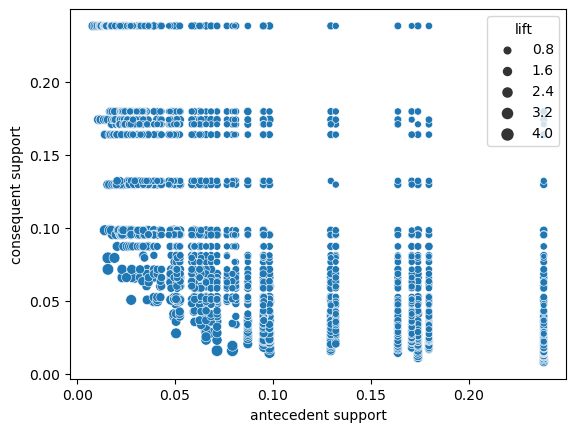

In [23]:
# Taking rules and plotting the rules based on support
# No rule appears more than 25%
# Most rules appear after 5%
import seaborn as sns
sns.scatterplot(x="antecedent support", y="consequent support", size="lift", data=rules)


Build thresholds for rules
Gives most meaningful rules to get the best results
Step process

## Pruning Rules

In [24]:
filtered_rules = rules[(rules['antecedent support'] > 0.05) &
                      (rules['consequent support'] > 0.05)].reset_index(drop=True)

In [25]:
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(Dust-Off Compressed Gas 2 pack, VIVO Dual LCD...",(SanDisk Ultra 64GB card),0.059725,0.098254,0.017064,0.285714,2.907928,0.011196,1.262445,0.697788
1,(SanDisk Ultra 64GB card),"(Dust-Off Compressed Gas 2 pack, VIVO Dual LCD...",0.098254,0.059725,0.017064,0.173677,2.907928,0.011196,1.137902,0.727602
2,(FEIYOLD Blue light Blocking Glasses),(10ft iPHone Charger Cable 2 Pack),0.065858,0.050527,0.008932,0.135628,2.684280,0.005605,1.098454,0.671697
3,(10ft iPHone Charger Cable 2 Pack),(FEIYOLD Blue light Blocking Glasses),0.050527,0.065858,0.008932,0.176781,2.684280,0.005605,1.134743,0.660851
4,"(VIVO Dual LCD Monitor Desk mount, Dust-Off Co...",(FEIYOLD Blue light Blocking Glasses),0.059725,0.065858,0.010265,0.171875,2.609786,0.006332,1.128021,0.656007
...,...,...,...,...,...,...,...,...,...,...
629,(Stylus Pen for iPad),(USB Type C to USB-A Charger cable),0.095054,0.080389,0.005199,0.054698,0.680420,-0.002442,0.972823,-0.341679
630,(VIVO Dual LCD Monitor Desk mount),(USB Type C to USB-A Charger cable),0.174110,0.080389,0.007999,0.045942,0.571492,-0.005998,0.963894,-0.475857
631,(USB Type C to USB-A Charger cable),(VIVO Dual LCD Monitor Desk mount),0.080389,0.174110,0.007999,0.099502,0.571492,-0.005998,0.917148,-0.449143
632,(USB Type C to USB-A Charger cable),(Dust-Off Compressed Gas 2 pack),0.080389,0.238368,0.007466,0.092869,0.389603,-0.011697,0.839605,-0.630133


 Filter rules based on lift to identify antecedents that have a positive effect on the likelihood of the consequent being purchased

In [26]:
#lift: Below 1 is negative influence
filtered_rules = rules[(rules['antecedent support'] > 0.05) &
                      (rules['consequent support'] > 0.05) &
                      (rules['lift'] > 1.0)].reset_index(drop=True)

In [27]:
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(Dust-Off Compressed Gas 2 pack, VIVO Dual LCD...",(SanDisk Ultra 64GB card),0.059725,0.098254,0.017064,0.285714,2.907928,0.011196,1.262445,0.697788
1,(SanDisk Ultra 64GB card),"(Dust-Off Compressed Gas 2 pack, VIVO Dual LCD...",0.098254,0.059725,0.017064,0.173677,2.907928,0.011196,1.137902,0.727602
2,(FEIYOLD Blue light Blocking Glasses),(10ft iPHone Charger Cable 2 Pack),0.065858,0.050527,0.008932,0.135628,2.684280,0.005605,1.098454,0.671697
3,(10ft iPHone Charger Cable 2 Pack),(FEIYOLD Blue light Blocking Glasses),0.050527,0.065858,0.008932,0.176781,2.684280,0.005605,1.134743,0.660851
4,"(VIVO Dual LCD Monitor Desk mount, Dust-Off Co...",(FEIYOLD Blue light Blocking Glasses),0.059725,0.065858,0.010265,0.171875,2.609786,0.006332,1.128021,0.656007
...,...,...,...,...,...,...,...,...,...,...
565,(HP 63XL Ink),(VIVO Dual LCD Monitor Desk mount),0.079323,0.174110,0.013998,0.176471,1.013557,0.000187,1.002866,0.014528
566,(HP 63XL Ink),(Anker USB C to HDMI Adapter),0.079323,0.068391,0.005466,0.068908,1.007555,0.000041,1.000555,0.008144
567,(Anker USB C to HDMI Adapter),(HP 63XL Ink),0.068391,0.079323,0.005466,0.079922,1.007555,0.000041,1.000651,0.008049
568,(HP 63XL Ink),(Nylon Braided Lightning to USB cable),0.079323,0.095321,0.007599,0.095798,1.005011,0.000038,1.000528,0.005416


Looking at our new rule set, we see that conviction is already greater than 1, indicating that the presence of the consequent is strongly dependent on the presence of the antecedent

Therefore, we can now focus on the confidence and use this metric to prune our rules set even more

In [28]:
#lift: Below 1 is negative influence
filtered_rules = rules[(rules['antecedent support'] > 0.05) &
                      (rules['consequent support'] > 0.05) &
                      (rules['lift'] > 1.0) &
                      (rules['confidence'] > .15)].reset_index(drop=True)

In [29]:
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(Dust-Off Compressed Gas 2 pack, VIVO Dual LCD...",(SanDisk Ultra 64GB card),0.059725,0.098254,0.017064,0.285714,2.907928,0.011196,1.262445,0.697788
1,(SanDisk Ultra 64GB card),"(Dust-Off Compressed Gas 2 pack, VIVO Dual LCD...",0.098254,0.059725,0.017064,0.173677,2.907928,0.011196,1.137902,0.727602
2,(10ft iPHone Charger Cable 2 Pack),(FEIYOLD Blue light Blocking Glasses),0.050527,0.065858,0.008932,0.176781,2.684280,0.005605,1.134743,0.660851
3,"(VIVO Dual LCD Monitor Desk mount, Dust-Off Co...",(FEIYOLD Blue light Blocking Glasses),0.059725,0.065858,0.010265,0.171875,2.609786,0.006332,1.128021,0.656007
4,(FEIYOLD Blue light Blocking Glasses),"(VIVO Dual LCD Monitor Desk mount, Dust-Off Co...",0.065858,0.059725,0.010265,0.155870,2.609786,0.006332,1.113898,0.660314
...,...,...,...,...,...,...,...,...,...,...
185,(Anker USB C to HDMI Adapter),(USB 2.0 Printer cable),0.068391,0.170911,0.011998,0.175439,1.026494,0.000310,1.005491,0.027705
186,(Syntech USB C to USB Adapter),(HP 61 ink),0.081056,0.163845,0.013598,0.167763,1.023915,0.000318,1.004708,0.025417
187,(TopMate C5 Laptop Cooler pad),(USB 2.0 Printer cable),0.076523,0.170911,0.013332,0.174216,1.019340,0.000253,1.004003,0.020546
188,(FEIYOLD Blue light Blocking Glasses),(Apple Pencil),0.065858,0.179709,0.011998,0.182186,1.013783,0.000163,1.003029,0.014554


In [116]:
filtered_rules = rules[(rules['antecedent support'] > 0.05) &
                      (rules['consequent support'] > 0.05) &
                      (rules['lift'] > 1.0) &
                      (rules['confidence'] > .25)].reset_index(drop=True)

In [117]:
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(Dust-Off Compressed Gas 2 pack, VIVO Dual LCD...",(SanDisk Ultra 64GB card),0.059725,0.098254,0.017064,0.285714,2.907928,0.011196,1.262445,0.697788
1,(10ft iPHone Charger Cable 2 Pack),(Screen Mom Screen Cleaner kit),0.050527,0.129583,0.015198,0.300792,2.321232,0.008651,1.244861,0.599484
2,(SanDisk Ultra 64GB card),(VIVO Dual LCD Monitor Desk mount),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943
3,"(Dust-Off Compressed Gas 2 pack, HP 61 ink)",(Screen Mom Screen Cleaner kit),0.052660,0.129583,0.013998,0.265823,2.051375,0.007174,1.185568,0.541012
4,"(VIVO Dual LCD Monitor Desk mount, Dust-Off Co...",(Screen Mom Screen Cleaner kit),0.059725,0.129583,0.015731,0.263393,2.032623,0.007992,1.181657,0.540294
5,(FEIYOLD Blue light Blocking Glasses),(VIVO Dual LCD Monitor Desk mount),0.065858,0.174110,0.022930,0.348178,1.999758,0.011464,1.267048,0.535186
6,(FEIYOLD Blue light Blocking Glasses),(Screen Mom Screen Cleaner kit),0.065858,0.129583,0.017064,0.259109,1.999567,0.008530,1.174826,0.535135
7,"(Dust-Off Compressed Gas 2 pack, Apple Pencil)",(Screen Mom Screen Cleaner kit),0.050927,0.129583,0.013065,0.256545,1.979774,0.006466,1.170773,0.521447
8,(10ft iPHone Charger Cable 2 Pack),(Dust-Off Compressed Gas 2 pack),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221
9,(Apple Lightning to Digital AV Adapter),(Apple Pencil),0.087188,0.179709,0.028796,0.330275,1.837830,0.013128,1.224818,0.499424


In [129]:
filtered_rules = rules[(rules['antecedent support'] > 0.05) &
                      (rules['consequent support'] > 0.05) &
                      (rules['lift'] > 1.0) &
                      (rules['confidence'] > .35)].reset_index(drop=True)

In [130]:
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(SanDisk Ultra 64GB card),(VIVO Dual LCD Monitor Desk mount),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943
1,(10ft iPHone Charger Cable 2 Pack),(Dust-Off Compressed Gas 2 pack),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221
2,(FEIYOLD Blue light Blocking Glasses),(Dust-Off Compressed Gas 2 pack),0.065858,0.238368,0.027596,0.419028,1.757904,0.011898,1.310962,0.461536
3,(SanDisk Ultra 64GB card),(Dust-Off Compressed Gas 2 pack),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401,0.474369
4,(Premium Nylon USB Cable),(Dust-Off Compressed Gas 2 pack),0.051060,0.238368,0.020131,0.394256,1.653978,0.007960,1.257349,0.416672
5,(Falcon Dust Off Compressed Gas),(Dust-Off Compressed Gas 2 pack),0.059992,0.238368,0.022797,0.380000,1.594172,0.008497,1.228438,0.396502
6,(Nylon Braided Lightning to USB cable),(Dust-Off Compressed Gas 2 pack),0.095321,0.238368,0.035729,0.374825,1.572463,0.013007,1.218270,0.402413
7,(Screen Mom Screen Cleaner kit),(Dust-Off Compressed Gas 2 pack),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650,0.409465
8,(Anker USB C to HDMI Adapter),(Dust-Off Compressed Gas 2 pack),0.068391,0.238368,0.024397,0.356725,1.496530,0.008095,1.183991,0.356144
9,(Stylus Pen for iPad),(Dust-Off Compressed Gas 2 pack),0.095054,0.238368,0.033729,0.354839,1.488616,0.011071,1.180529,0.362712


## Part 2

- Visualizations
- Answering research question

### Support-Confidence Border: Reveals the most optimal rules 
- Rules that lie on the plot where either support, confidence, or both are maximized
- We want to identify what is the best trade-off between the confidence, support, and lift.

<Axes: xlabel='support', ylabel='confidence'>

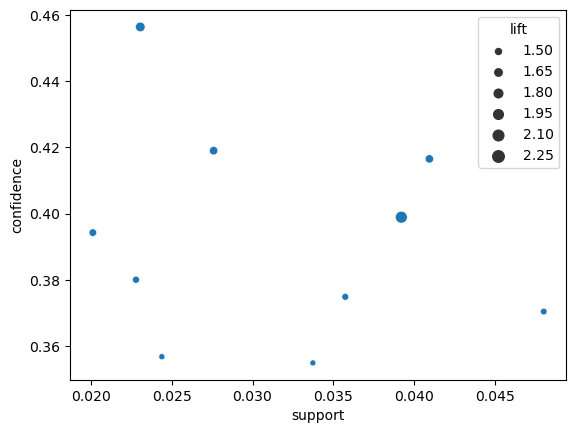

In [120]:
sns.scatterplot(x = "support", y = "confidence", size = "lift", data = filtered_rules)
#best trade-off based on support-confidence border
#want to include products people are buying

## Top 3 Rules:
- Filtering based on confidence

In [121]:
top_rules = filtered_rules[filtered_rules['confidence'] > .4].reset_index(drop=True)
top_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(10ft iPHone Charger Cable 2 Pack),(Dust-Off Compressed Gas 2 pack),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221
1,(FEIYOLD Blue light Blocking Glasses),(Dust-Off Compressed Gas 2 pack),0.065858,0.238368,0.027596,0.419028,1.757904,0.011898,1.310962,0.461536
2,(SanDisk Ultra 64GB card),(Dust-Off Compressed Gas 2 pack),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401,0.474369


### Frozen Set in Python:
- Immutable: Once the set or list is created, elements cannot be added or removed
- Frozen sets do not have the built-in plotting functionality like lists or arrays
- Solution: Transform the frozen set to a list

In [136]:
filtered_rules['antecedents'] = filtered_rules['antecedents'].apply(lambda antecedent: list(antecedent) [0])
filtered_rules['consequents'] = filtered_rules['consequents'].apply(lambda consequent: list(consequent) [0])



In [137]:
filtered_rules['rule'] = filtered_rules.index

In [138]:
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,rule
0,SanDisk Ultra 64GB card,VIVO Dual LCD Monitor Desk mount,0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943,0
1,10ft iPHone Charger Cable 2 Pack,Dust-Off Compressed Gas 2 pack,0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221,1
2,FEIYOLD Blue light Blocking Glasses,Dust-Off Compressed Gas 2 pack,0.065858,0.238368,0.027596,0.419028,1.757904,0.011898,1.310962,0.461536,2
3,SanDisk Ultra 64GB card,Dust-Off Compressed Gas 2 pack,0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401,0.474369,3
4,Premium Nylon USB Cable,Dust-Off Compressed Gas 2 pack,0.051060,0.238368,0.020131,0.394256,1.653978,0.007960,1.257349,0.416672,4
5,Falcon Dust Off Compressed Gas,Dust-Off Compressed Gas 2 pack,0.059992,0.238368,0.022797,0.380000,1.594172,0.008497,1.228438,0.396502,5
6,Nylon Braided Lightning to USB cable,Dust-Off Compressed Gas 2 pack,0.095321,0.238368,0.035729,0.374825,1.572463,0.013007,1.218270,0.402413,6
7,Screen Mom Screen Cleaner kit,Dust-Off Compressed Gas 2 pack,0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650,0.409465,7
8,Anker USB C to HDMI Adapter,Dust-Off Compressed Gas 2 pack,0.068391,0.238368,0.024397,0.356725,1.496530,0.008095,1.183991,0.356144,8
9,Stylus Pen for iPad,Dust-Off Compressed Gas 2 pack,0.095054,0.238368,0.033729,0.354839,1.488616,0.011071,1.180529,0.362712,9


In [139]:
# sets the axes to be the same so we can see the comparison
coords = filtered_rules[['antecedents','consequents','rule']]


## Parallel Coordinates Plot
- Helps visualize relationships, trends, and variations

Looking at the plot below, that includes the top 10 rules, we can see that there are 2 consequents that have relationships with antecedents (Compressed gas and the monitor desk mount).

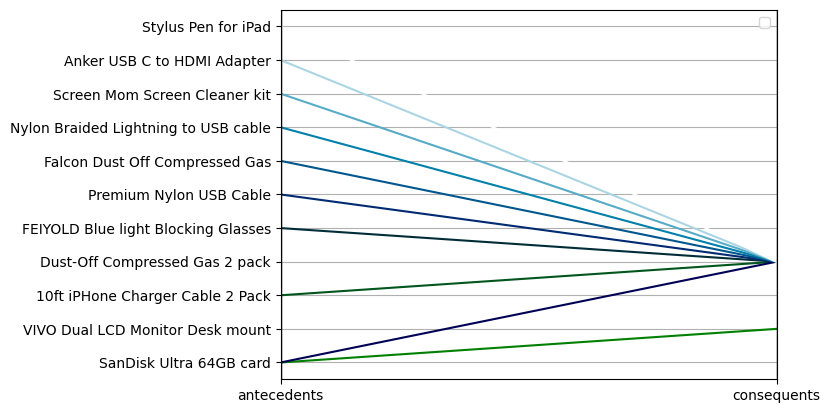

In [140]:
from pandas.plotting import parallel_coordinates

#shows the relationship in the filtered rules to show how antecedents lead to consequents
plt = parallel_coordinates(coords, 'rule', colormap = 'ocean')
plt.legend([])

## Results and Recommendations:
- **Research Question**: Can we use market basket analysis to understand the relationships between items purchased by our customers? 

- It is recommended that the store sells compressed gas with the 9 antecedents that have a relationship with it.
- Using the rules, bundles could be developed as a strategic marketing plan, re-arrangements could be made based on the items that have relationships with each other to make it more convenient for shoppers